# Setup

In [ ]:
import numpy as np
import seaborn as sns  # For plotting
from scipy import stats as st  # For standard normal distribution values

# This is a "random number generator" we'll use for simulations etc.
RANDOM_STATE = np.random.RandomState(123)

You're given a huge jar of Skittles and M&M's, mixed together (yuck!).

You randomly pick 10 pieces of candy from the jar, and end up with 4 Skittles
and 6 M&M's.

**What proportion of the jar do you think are M&M's?**

A natural, intuitive, **estimate** for the proportion of M&M's in the jar would be

$$\frac{6}{4 + 6} = 0.6$$

But what can we say about this number?
How certain are we that if we count _all_ the candy in the jar, the proportion
of M&M's will be close to 60%?

To answer these questions, we have to think more carefully about how that
**0.6** came about, and what it means.

# Estimator

To better analyze this number, we need to introduce some generalizations—here, mostly in the form of notation.

Let's say there are $C$ pieces of candy in the jar and $M$ pieces are
M&M's (i.e., there are $C-M$ Skittles in the jar). We'll call the actual
proportion of M&M's in the jar $p$, which is exactly $M/C$.

Then, taking out one candy from the jar and inspecting whether it's an M&M or
Skittle is equivalent to a Bernoulli trial with probability $p$ of "success".
We can also do this multiple times, and each time would be an independent
Bernoulli trial, as long as we put the candy back in the jar every time.

For each piece of candy that we inspect, let's write a 1 if it's an M&M and a
0 if it's a Skittle, and we'll call the $i^\textrm{th}$ number we write $X_i$.
Then we can say that the **0.6** above comes from using the following **estimator**:

$$\hat{p} = \frac{1}{N}\sum_{i = 1}^{N}X_i$$

with our observed data ($X_1, X_2, \cdots X_{10}$), where $N$ is the number of
pieces of candy we get to count.


Now, to answer questions regarding our (un)certainty about that **0.6**
number, we need to figure out the **distribution** of our estimator,
$\hat{p}$.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Distribution of an estimator

### A simulation



Before diving into distributions with more notation, symbols, and all that,
let's think more carefully about what "**the distribution of** $\hat{p}$"
actually means. For this, we'll pretend we know exactly how many M&M's and
Skittles are in the jar, and see what happens when we compute values of $\hat{p}$.

First, let's create that jar:

In [ ]:
M = 1000   # Let's say this is the number of  M&M's
S = 3000   # and this is the number of Skittles.
C = M + S  # Then this is the total
print(C)

4000


and the actual proportion of M&M's ($p$) is simply:

In [ ]:
p = M/C
print(p)

0.25


Then, randomly inspecting 10 pieces of candy from the jar is equivalent to sampling 10 times with a probability $p$ of choosing an M&M (`m`) vs. Skittles (`s`).

In [ ]:
N = 10  # This is how many we get to count

counted_candies = RANDOM_STATE.choice(a=[1, 0], p=[p, 1-p], size=N)
print(p)
print(counted_candies)

0.25
[0 0 1 0 0 0 0 0 0 0]


Remember, drawing an M&M is considered a "success" in this setting, so we can compute our estimator $\hat{p}$ with

In [ ]:
p_hat = counted_candies.sum()/N
print(p_hat)

0.1


The mean of a vector of 0s and 1s is the proportion of elements in the vector that are 1, so we can also do this:

In [ ]:
p_hat = counted_candies.mean()
print(p_hat)

0.1


But that $\hat{p}$ is just a number! How do we find its distribution? What does a distribution for $\hat{p}$ even mean?!

### Sampling distributions


The distribution of an estimator (also commonly known as the sampling
distribution) refers to how the values of $\hat{p}$ would look like
**if we were to repeat the counting for a whole bunch of samples (of the same size)**.

In other words, if there were multiple parallel universes,
what would the proportion of M&M's in each
of those samples of 10 candies look like across all the universes?

While it might be a little difficult to create a bunch of parallel universes in
practice, this can easily be done inside a computer.

Recall, we can generate a sample of size `N` with probability `p` of getting an M&M (`1`), and subsequently compute an estimate $\hat{p}$ with:

In [ ]:
def sample_and_estimate(n):
  candies = RANDOM_STATE.choice(a=[1, 0], p=[p, 1-p], size=n)
  return candies.mean()

sample_and_estimate(n=N)

0.1

Then, we can simulate repeating this in `B` parallel universes as:

In [ ]:
B = 1000  # Number of parallel universes to create
multiverse_p_hats = np.array([
  sample_and_estimate(n=N) for _ in range(B)
])
print(multiverse_p_hats)

[0.1 0.1 0.3 0.4 0.1 0.2 0.2 0.2 0.1 0.3 0.2 0.2 0.1 0.4 0.3 0.4 0.3 0.2
 0.3 0.4 0.2 0.3 0.5 0.3 0.3 0.2 0.5 0.  0.4 0.1 0.1 0.4 0.2 0.3 0.2 0.3
 0.2 0.3 0.  0.3 0.2 0.4 0.3 0.4 0.3 0.2 0.2 0.  0.3 0.3 0.2 0.4 0.3 0.
 0.2 0.3 0.2 0.4 0.1 0.1 0.3 0.4 0.2 0.2 0.3 0.1 0.3 0.4 0.2 0.2 0.  0.2
 0.2 0.3 0.3 0.3 0.1 0.3 0.3 0.3 0.3 0.1 0.2 0.3 0.1 0.5 0.3 0.1 0.4 0.5
 0.  0.3 0.1 0.3 0.3 0.3 0.3 0.3 0.1 0.5 0.3 0.5 0.2 0.3 0.5 0.4 0.5 0.3
 0.2 0.1 0.3 0.4 0.3 0.5 0.6 0.3 0.1 0.3 0.  0.3 0.3 0.6 0.2 0.1 0.3 0.1
 0.3 0.2 0.4 0.3 0.2 0.3 0.5 0.3 0.2 0.2 0.2 0.2 0.2 0.3 0.  0.3 0.5 0.2
 0.2 0.4 0.3 0.2 0.2 0.3 0.2 0.4 0.3 0.1 0.4 0.1 0.2 0.4 0.3 0.2 0.3 0.1
 0.3 0.4 0.3 0.2 0.3 0.1 0.3 0.2 0.  0.1 0.5 0.3 0.5 0.2 0.3 0.5 0.2 0.2
 0.2 0.4 0.1 0.2 0.3 0.2 0.2 0.3 0.2 0.  0.2 0.3 0.3 0.6 0.2 0.2 0.2 0.2
 0.3 0.4 0.2 0.3 0.3 0.3 0.5 0.2 0.4 0.1 0.3 0.  0.3 0.1 0.3 0.  0.2 0.
 0.3 0.3 0.3 0.3 0.3 0.2 0.3 0.3 0.2 0.2 0.3 0.2 0.3 0.3 0.4 0.2 0.3 0.4
 0.1 0.5 0.5 0.6 0.2 0.2 0.4 0.1 0.3 0.1 0.3 0.2 0.3 

Now that we have `B` values of $\hat{p}$ from `B` parallel universes, make a histogram of the $\hat{p}$ values.


<Axes: ylabel='Count'>

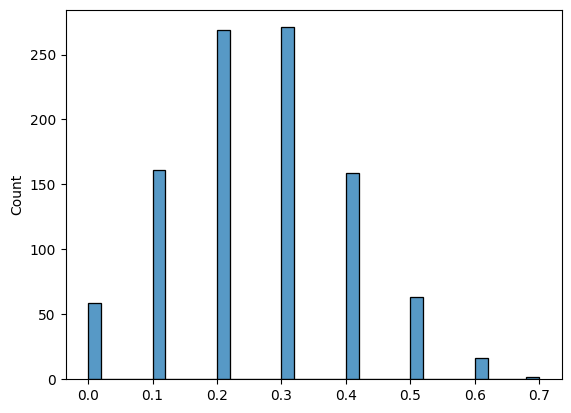

In [ ]:
sns.histplot(multiverse_p_hats)

_This_ is (a sample of) the "sampling distribution"!

Again, remember: you NEVER get to see this in real life!

#### Properties of sampling distributions

While we know the true value of $p$ (because we made it up, remember?!), we see that the value of $\hat{p}$ varies across all `B` universes.

However, the _average_ of $\hat{p}$ (the estimated expected value of $\hat{p}$) across all those universes is actually not that far from the _true_ $p$.

In [ ]:
print(f"True value of p = {p:.2f}")
mean_p_hats = multiverse_p_hats.mean()  # Estimated expected value of p_hat
print(f"Mean value of p_hat in {B:,} universes = {mean_p_hats}")

True value of p = 0.25
Mean value of p_hat in 1,000 universes = 0.25730000000000003


This difference between the actual value of interest ($p$) and the expected
value of an estimator (average across multiple universes) is what's known as
the **bias of an estimator**:

$$\mathbb{E}_p(\hat{p}) - p$$


In [ ]:
print(f"Bias of p_hat = {mean_p_hats - p:.2f}")

Bias of p_hat = 0.01



We can also estimate the standard deviation of our estimator $\hat{p}$ across
multiple universes (often called the estimated **standard error**):

In [ ]:
multiverse_p_hats.std()

# the estimate is 0.2571 +/- 0.1358

0.1359658412984673

Note, this is _NOT_ the standard deviation of some observed data. This is the standard deviation of some _simulated_ values of $\hat{p}$ across multiple parallel universes!

### The math



We can also compute the properties of our estimator $\hat{p}$ analytically,
without simulation.

First, we have to start with basic probability, and some notation.

Let's say that what we observe is $X_i$, and each of these $X_i$ all follow
(independently and identically) a Bernoulli distribution with probability of
success $p$.

Then, from the [properties of a Bernoulli
distribution](https://en.wikipedia.org/wiki/Bernoulli_distribution) we know that

\begin{align*}
\mathbb{E}_p(X_i) & = p \\
\mathrm{Var}_p(X_i) & = p(1-p) \\
\end{align*}

where the subscript $_p$ in
$\mathbb{E}_p$ and $\mathrm{Var}_p$ simply means that the actual value $p$ is fixed (i.e., it's _not_ random).

**Linearity of expectation** implies:

$$\mathbb{E} \left( \sum_{i=1}^n X_i \right) = \sum_{i=1}^n \mathbb{E}(X_i)$$

and

$$\mathbb{E} (aX_i)  = a\mathbb{E}(X_i)$$

for some constant $a$.

Recall our estimator:

$$\hat{p} = \frac{1}{N}\sum_{i = 1}^{N}X_i$$

#### Exercise

> **Using the facts above, derive an expression for $\mathbb{E}_p(\hat{p})$.**

\begin{align*}
\mathbb{E}_p(\hat{p}) & = \mathbb{E}_p\left(\frac{1}{N}\sum_{i = 1}^{N}X_i\right) \\
  & = \frac{1}{N}\mathbb{E}_p\left(\sum_{i = 1}^{N}X_i\right) \\
  & = \frac{1}{N}\sum_{i = 1}^{N}\mathbb{E}_p(X_i) \\
  & = \frac{1}{N}\sum_{i = 1}^{N}p \\
  & = \frac{1}{N}Np \\
  & = p
\end{align*}

#### Bias

For the bias, we want to figure out the value of

$$\mathbb{E}_p(\hat{p}) - p$$

$\mathbb{E}_p(\hat{p}) - p = 0$, so we'd call $\hat{p}$ **unbiased**.

This is confirmed in our simulation above, where we find that the average of our $\hat{p}$ estimates across `B` multiverses is very close to the true value of $p$!

##### **A note on population vs. sample variance**

Remember that weird note on population vs. sample variance, and degrees of freedom?

Well, it turns out that, for some observations $X_1, X_2, \dots, X_n$ from some population with variance $\sigma^2$, if you have estimators

$$\bar{X} = \frac{1}{n}\sum_{i=1}^nX_i$$

and

$$\hat{\sigma}^2 = \frac{1}{n} \sum_{i=1}^n \left( X_i - \bar{X} \right)^2$$

you can find that:


$$\mathbb{E}_\sigma(\hat{\sigma}^2) = \frac{n-1}{n}\sigma^2$$

([proof](https://proofwiki.org/wiki/Bias_of_Sample_Variance))

In other words, as an _estimator_ of some population variance, $\hat{\sigma}^2$ is biased by a factor of $\frac{n-1}{n}$.
Because $n$ is a constant, using linearity of expectation, we can easily "adjust" for this bias by multiplying our estimator by the inverse $\frac{n}{n-1}$:

\begin{align*}
\frac{n}{n-1}
\hat{\sigma}^2
& =
\frac{n}{n-1}
\frac{1}{n} \sum_{i=1}^n \left( X_i - \bar{X} \right)^2 \\
& =
\frac{1}{n-1} \sum_{i=1}^n \left( X_i - \bar{X} \right)^2 \\
\end{align*}


This is how we arived at the _sample_ variance/standard deviation formula that divide by $n-1$ instead of $n$, and this is an _unbiased_ estimate of some population variance $\sigma^2$.

#### Standard error

Again, what's known as the **standard error** is simply the **standard deviation of the sampling distribution**, where the _sampling distribution_ is the distribution of values that our estimator $\hat{p}$ would take across multiple parallel universes.

In other words, we want to know

$$\sqrt{\mathrm{Var}_p(\hat{p})}$$

In case it's not clear yet, $\hat{p}$ is a **random variable** that can take multiple values, depending on the exact samples ($X_i$) we happened to get, and $p$ is a real, fixed value (the proportion of M&M's in the jar) that won't change no matter how many candies we sample (unless we eat them).

#### Exercise

> Using the facts that
> * The variance of a Bernoulli random variable with probability of success $p$ is $p(1-p)$
> * For some random variable $X$ and a constant $a$,  $\mathrm{Var}(aX) = a^2\mathrm{Var}(X)$
> * For two _independent_ random variables $X$ and $Y$, $\mathrm{Var}(X + Y) = \mathrm{Var}(X) + \mathrm{Var}(Y)$
>
> derive an expression for $\mathrm{Var}_p(\hat{p})$, and the standard error  $\sqrt{\mathrm{Var}_p(\hat{p})}$

\begin{align*}
\mathrm{Var}_p(\hat{p})
  & = \mathrm{Var}_p\left(\frac{1}{N}\sum_{i = 1}^{N}X_i\right) \\
  & = \frac{1}{N^2}\sum_{i = 1}^{N}\mathrm{Var}_p(X_i) \\
  & = \frac{1}{N^2}Np(1-p) \\
  & = \frac{p(1-p)}{N}
\end{align*}

and the standard error is:

$$\sqrt{\mathrm{Var}_p(\hat{p})} = \sqrt{\frac{p(1-p)}{N}}$$

We can compare our result with the standard deviation of our estimates
across multiverses, i.e.,

In [ ]:
# This is what the theory predicts we'll see
se_true = np.sqrt(p * (1 - p) / N)

# This is what we get from parallel universes
se_simulated = multiverse_p_hats.std()

print(f"Actual standard error: {se_true:.4f}")
print(f"Simulated standard error: {se_simulated:.4f}")

Actual standard error: 0.1369
Simulated standard error: 0.1360


But note that in practice, we can't compute the theoretical standard error, since it requires knowing the value of $p$, which in this case, we know _only because we created it out of thin air_.

So, in reality, we'd _estimate_ the standard error, by using our estimated value of $\hat{p}$, in place of the true value $p$. For example, in this case we'd compute

$$\hat{\mathrm{se}} =  \sqrt{\frac{\hat{p}(1-\hat{p})}{N}}$$

### Exercise

> Calculate $\hat{\mathrm{se}}$—the estimated standard error—for our estimator from the very first example of 6 M&M's in a sample of 10 candies.

In [ ]:
N = 10
p_hat = 6 / 10
se_hat = np.sqrt(p_hat * (1 - p_hat) / N)

print(f"{se_hat:.2f}")

0.15


# Finding the sampling distribution of an estimator

In _general_, it's difficult to analytically come up with a sampling distribution.

Here we discuss two popular techniques:

1. Central limit theorem (CLT): Analytically convincing yourself that your sampling distribution is normal
2. Bootstrap: Computationally simulating your sampling distribution

## Analytical (using Central Limit Theorem)

A very popular theorem that is used as a sledgehammer to solving this "sampling distribution" problem is the Central Limit Theorem (CLT), which states:

> The sum of independent and identically distributed (i.i.d) random variables tends to a normal distribution as the number of random variables increases


In [ ]:
# Number of variables
M = 5
# Number of observations
N = 30

uniform_rvs = RANDOM_STATE.uniform(size=(M, N))

# Each row is an independent variable with N observations
print(uniform_rvs.shape)
uniform_rvs

(5, 30)


array([[0.28422741, 0.27327404, 0.54952455, 0.75035437, 0.97611748,
        0.57371176, 0.20624832, 0.82152436, 0.63547469, 0.34722974,
        0.89551284, 0.6205484 , 0.63709746, 0.13155514, 0.78506594,
        0.92494635, 0.94497093, 0.00240413, 0.43615838, 0.3465129 ,
        0.25490183, 0.06948685, 0.35662821, 0.63019119, 0.9467172 ,
        0.29887212, 0.34867537, 0.586972  , 0.80376298, 0.81419304],
       [0.54674807, 0.40099035, 0.42873827, 0.72249523, 0.96933413,
        0.94104822, 0.52730827, 0.73898608, 0.47597365, 0.3369261 ,
        0.69332649, 0.89268675, 0.46519357, 0.85158923, 0.58889596,
        0.37284648, 0.14467746, 0.06908071, 0.97500252, 0.07882996,
        0.99044969, 0.70220044, 0.64724351, 0.47752253, 0.94923038,
        0.57259502, 0.42601864, 0.46501544, 0.82148732, 0.8752513 ],
       [0.60466041, 0.01593661, 0.0850618 , 0.95135781, 0.5569969 ,
        0.96422987, 0.55422015, 0.79493249, 0.65972452, 0.69265462,
        0.54113371, 0.75951606, 0.49891861, 0.

<Axes: ylabel='Count'>

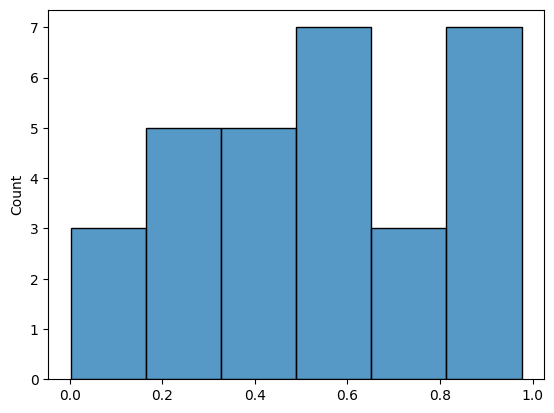

In [ ]:
# For example, a histogram of the first variable:
sns.histplot(uniform_rvs[0, :])

So, we have `M` variables that are independent, and have identical distribution as the one shown above.

CLT states---whether you believe it or not!---that the variable which results from adding up these i.i.d. variables will tend to a normal distribution, if the number of variables `M` is large enough!

For these `M` variables, we see:

In [ ]:
# This is how we add the M variables, to get N observations of the new variable
uniform_rvs.sum(axis=0)

array([2.43613033, 1.2699846 , 1.88284217, 3.71790554, 3.77912176,
       3.32064022, 2.83028757, 2.95399752, 2.27408767, 2.05976147,
       3.17620572, 3.73049715, 2.67420227, 3.43928477, 3.19498077,
       2.94895842, 2.38149914, 1.04892831, 3.21781153, 2.30451462,
       2.99032102, 1.69051429, 2.77461658, 3.1837412 , 3.92191341,
       2.12981002, 2.02647875, 2.80782379, 3.06792249, 3.62189443])

<Axes: ylabel='Count'>

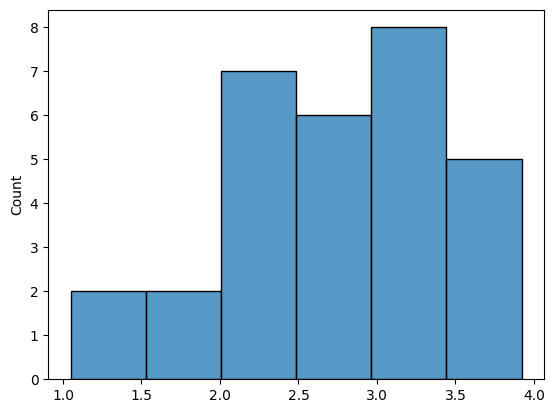

In [ ]:
sns.histplot(uniform_rvs.sum(axis=0))

(50, 5000)


<Axes: ylabel='Count'>

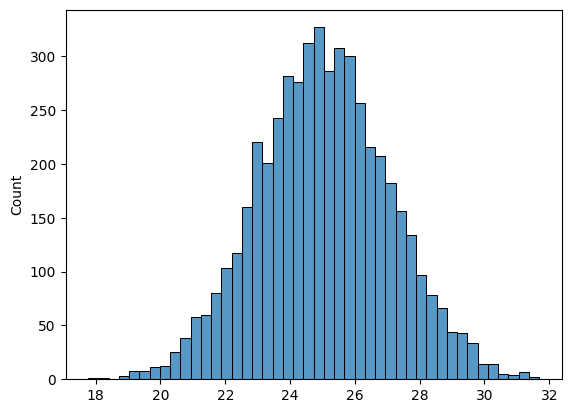

In [ ]:
# Try with different values of M and N

# Number of variables
M = 50
# Number of observations
N = 5000

X = RANDOM_STATE.uniform(size=(M, N))

print(X.shape)

sns.histplot(X.sum(axis=0))

<Axes: ylabel='Count'>

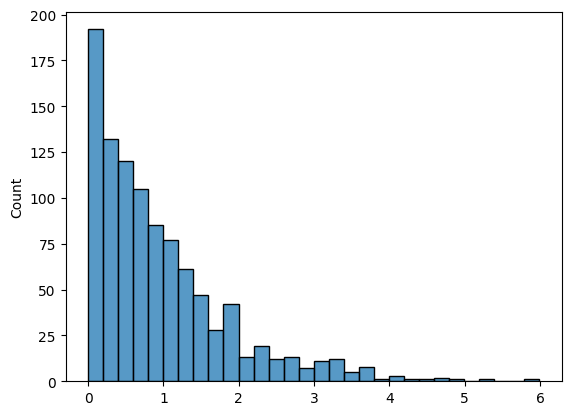

In [ ]:
# This works for _any_ distribution (with finite variance)

M = 30
N = 1_000

X = RANDOM_STATE.exponential(size=(M, N))

sns.histplot(X[0, :])

<Axes: ylabel='Count'>

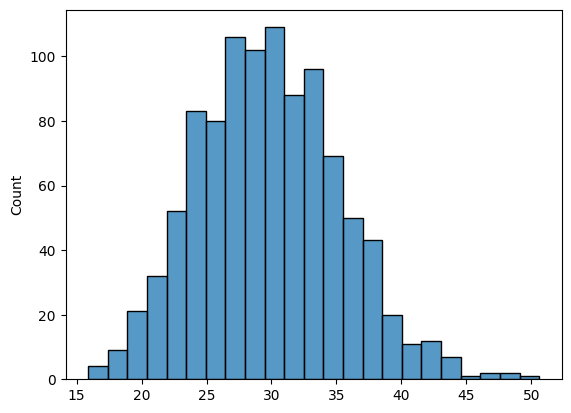

In [ ]:
sns.histplot(X.sum(axis=0))

## Computational (using bootstrap)



With the bootstrap, the goal is to simulate parallel universes, using our
observations as an approximation of the population.
We can create one universe by resampling from our observed data
and then computing our estimate over this new "sample".

An analogy would be to write down each of the results we got from our draws (M&M or Skittles), put them in a _new_ jar, and then randomly pull out numbers out of
that new jar, pretending that it represents the actual jar.

We can repeat this process many many times, and use the (pretend) _estimates_ we get from this process to build a _numerical_ approximate of the sampling distribution.

### Some questions

* Should we sample with or without replacement?
* How big should each of our samples be?

In [ ]:
# Recall, we actually know, from our analytical results
N = 10
p_hat = 6 / 10
se_hat = np.sqrt(p_hat * (1 - p_hat) / N)

print(f"{se_hat:.2f}")

0.15


Now lets see if a bootstrap can get reasonably close estimates.

In [ ]:
observed_values = [0] * 4 + [1] * 6
observed_values

[0, 0, 0, 0, 1, 1, 1, 1, 1, 1]

In [ ]:
# The bootstrap sample size. Can be as large as we want.
B = 10_000
bs_sample = np.array(
    [
        # Remember, we want samples of _estimates_, where
        # our estimator was the sample mean
        RANDOM_STATE.choice(
            observed_values,
            size=len(observed_values),
            replace=True,
        ).mean()
        for _ in range(B)
    ]
)

print(bs_sample)

[0.4 0.9 0.7 ... 0.6 0.4 0.7]


The `bs_sample` array now represents a literal/numerical approximation of our sampling distribution, and we can use it to approximate certain properties of our estimator (e.g., standard error).

In [ ]:
bs_sample.std()

0.1556984213150538

Note how we don't make any assumptions about the underlying distribution of our data, or rely on any theorem the dictates the sampling distribution. This is what makes the bootstrap very powerful.

... But then what _is_ the primary assumption? Why not always use the bootstrap for EVERYTHING?

In practice, these days, many applications actually _do_ use bootstrap for EVERYTHING! But important to note:

1. Computationally expensive
2. A pretty big assumption is that the data we happen to have "adequately represents" the population (vs. CLT, if it applies, only requires finite mean/variance and "large-ish" sample size)